In [76]:
import this
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from numpy.random import default_rng

%matplotlib inline

## 1a – Base Model)

Create a Python based model to that relates profit to the inputs. It must be an object oriented model. Since I’m going to ask you to create some data tables and to do some goal seeking, the structure of your model should be roughly similar to the BookstoreModel we did in the course notes. Obviously, the details will be different as it’s a different problem. Here’s a “check value” – for Selling Price=$115 you should get "Demand≈1668 " and Profit=$20028 Don’t worry about getting fractional demand values – it’s fine for this model. Here’s a screenshot of my model class declaration:

In [41]:
class SingleProductSPF(Model):
    
    def __init__(self, 
                 fixed_cost = 5000,
                 variable_cost = 100, 
                 selling_price = 115, 
                 spf_constant = 4900,
                 spf_linear = -35,
                 spf_quadratic = 0.06):
        
        self.fixed_cost = fixed_cost
        self.variable_cost = variable_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
  
     
    def demand(self):
        """"D"=0.06S^2-35S+4900"""
        return ((self.spf_quadratic * self.selling_price ** 2) + (self.spf_linear * self.selling_price) + self.spf_constant)

    def revenue(self):
        """"revenue = demand * selling price"""
        return self.demand() * self.selling_price

    def total_cost(self):
        """"total_cost =  fixed_cost + (variable_cost * demand)"""
        return self.fixed_cost + self.demand() * self.variable_cost
    
    def profit(self):
        '''
        Compute profit        
        profit = revenue - 
        '''
        return self.revenue() - self.total_cost()

In [42]:
base_model = SingleProductSPF()


In [43]:
base_model.demand()

1668.5

In [44]:
base_model.profit()

20027.5

## 1b – 1-way Data Table)

Once your base model is done, create a one-way data table using our data_table function to show how profit and demand are related to selling price. Profit and demand are the outputs and selling price is the input. Let price range from $80 to $140 in steps of $10. In addition, create a graph based on your data table object so that it is easy to visualize the relationship between selling price and profit. Make sure your graph has all axes labeled, has titles, has axes properly formatted, and looks good. Discuss the shape of this relationship. Is it linear? Is it nonlinear? Why do you think the graph has the shape it does?

In [45]:
selling_price = np.arange(80, 141, 10)
selling_price

array([ 80,  90, 100, 110, 120, 130, 140])

In [48]:
base_model.selling_price = selling_price
profit = base_model.profit()
demand = base_model.demand()

print(profit)
print(demand)

[-54680. -27360.  -5000.  12760.  26280.  35920.  42040.]
[2484. 2236. 2000. 1776. 1564. 1364. 1176.]


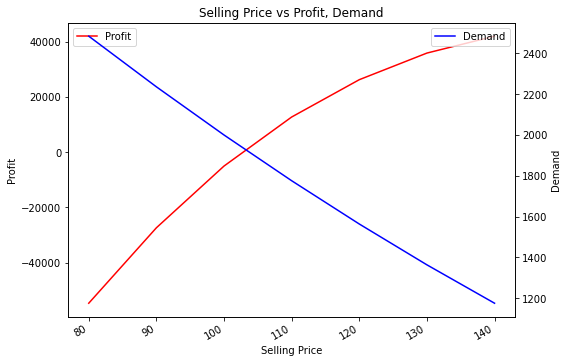

In [49]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.set_ylabel("Profit")
ax2.set_ylabel("Demand")
ax1.set_xlabel("Selling Price")
ax1.plot(selling_price, profit, color = 'red', label = 'Profit')
ax2.plot(selling_price, demand, color = 'blue', label = 'Demand')
fig.autofmt_xdate()

ax1.legend()
ax2.legend(loc = 'upper right')
plt.title("Selling Price vs Profit, Demand")
plt.show()

## 1c – Break Even)

Use our goal_seek function to find the break even selling price between $80 and $140. 

In [50]:
from whatif import Model
from whatif import get_sim_results_df

import whatif

In [51]:
Model.goal_seek(base_model,'profit',0,'selling_price',80,140)

102.57578606424767

Based on our output and our plot above the breakeven point is at 102.5

## 1d – 2-way Data Table) 

You are also interested in the sensitivity of profit AND total cost to different combinations of selling price and the variable production cost. So, create a 2-way data table using data_table  for these two input variables. Let price range from dollar 80 to dollar 140 in steps of dollar 10 and let the variable production cost vary from dollar 85 to dollar 110 in steps of dollar 5. Figure out a way to create a plot based on the 2-way data table so that the user can visualize how price and variable production cost impact profit.

In [53]:
dt_param_ranges_2 = {'selling_price': np.arange(80, 141, 10),
                     'variable_cost': np.arange(85, 111, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'total_cost']

#model_trial = whatif.Model()


df_2_way = base_model.data_table(dt_param_ranges_2, outputs)
df_2_way.head()

,selling_price,variable_cost,profit,total_cost
0,80,85,-17420.0,216140.0
1,80,90,-29840.0,228560.0
2,80,95,-42260.0,240980.0
3,80,100,-54680.0,253400.0
4,80,105,-67100.0,265820.0


# plot 


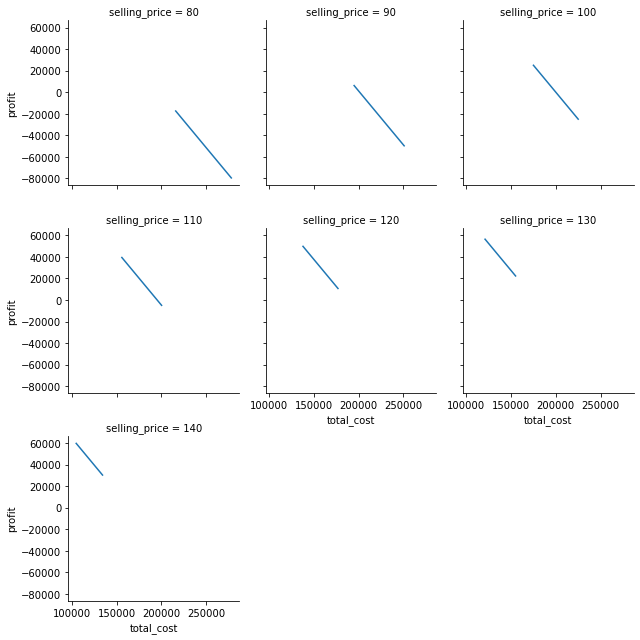

In [57]:
profit_dt_g = sns.FacetGrid(df_2_way, col="selling_price", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "total_cost", "profit")

# 1e – Digging deeper) 

Now let’s explore this simple model a little bit further. Please do the following:

•	Redo the Goal Seek but instead of using $80-$140 as your search range, use $80-$250. What happens? Why do you think this happens?
•	Redo your 1-way data table and associated selling price vs profit plot but use $80-$250 as your input range. Now, why do you think that your Goal Seek failed?


In [23]:
Model.goal_seek(base_model,'profit',0,'selling_price',80,250)

Goal seek doesnt product any output.
 
Why?????



In [59]:
dt_param_ranges_1 = {'selling_price': np.arange(80, 251, 10)}

# Specify desired outputs (list)
outputs = ['profit']

df_1_way = base_model.data_table(dt_param_ranges_1, outputs)
df_1_way

,selling_price,profit
0,80,-54680.0
1,90,-27360.0
2,100,-5000.0
3,110,12760.0
4,120,26280.0
5,130,35920.0
6,140,42040.0
7,150,45000.0
8,160,45160.0
9,170,42880.0


# explain...

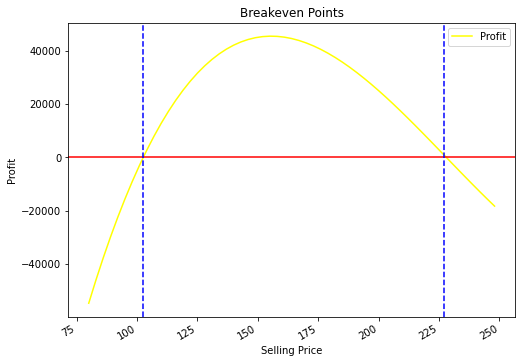

In [73]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot()
ax1.set_ylabel("Profit")
ax1.set_xlabel("Selling Price")
ax1.plot(df_1_way['selling_price'], df_1_way['profit'], color = 'yellow', label = 'Profit')
plt.axhline(y=0, color='red', linestyle='-')

plt.axvline(x=102.5, color='blue', linestyle='--')
plt.axvline(x=227, color='blue', linestyle='--')
#ax2.plot(selling_price, demand, color = 'blue', label = 'Demand')
fig.autofmt_xdate()

ax1.legend()
plt.title("Breakeven Points")
plt.show()

For the given ranges of selling price the value of profit gets below the breakeven point twice. Plus the goal seek funtion from whatif package only returns one goal seeks and empty oterwise



Returns

        -------
        
        x_N : number
        
            The midpoint of the Nth interval computed by the bisection method. The
            initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
            midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
            If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
            iteration, the bisection method fails and return None.

# 1f – Simulation)

Let’s add some uncertainty to the variable cost. Specifically, let’s model it with a uniform distribution between (80, 120). 

Use our simulate function to simulate this and answer the following questions:



In [77]:
rg = default_rng(4470)

In [82]:
random_inputs = {'variable_cost': rg.uniform(80, 120, 100)}


sim_outputs = ['profit']

scenario_inputs = {'selling_price': np.arange(80, 141, 10)}


model_simulate = base_model.simulate(random_inputs, sim_outputs, scenario_inputs)



In [83]:
print(model_simulate)

[{'scenario_base_vals': {'fixed_cost': 5000, 'variable_cost': 100, 'selling_price': array([ 80,  90, 100, 110, 120, 130, 140]), 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}, 'scenario_num': 0, 'scenario_vals': {'selling_price': 80}, 'output': {'profit': array([ -66070.48383621,  -44290.22876623,  -86865.2139714 ,
        -34781.85708232,  -49255.21031578,  -99840.13332579,
        -60929.20147715,  -79027.39954499,  -74170.23035161,
        -82650.22795498,  -80822.92613338,  -67107.82154411,
       -100675.06504077,  -48780.12742434,  -92454.5639438 ,
        -28685.81771329,   -9501.54231522, -101642.00852009,
        -10715.60721179,  -33213.9545564 ,  -87736.86327767,
        -94464.609821  ,  -81351.44831287,  -82926.88977737,
        -82715.66178588,   -8248.16184974,  -73213.98690341,
        -46511.99481487,  -78007.67942897, -102360.50276528,
        -10517.73450864,  -57040.91014703,  -44280.71610069,
        -98938.14724212,  -93757.44538114, -100284.99643

1)	Create a histogram of profit

In [84]:
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

In [85]:
model2_results_df = get_sim_results_df(model_simulate)

In [86]:
print(model2_results_df)

          profit  scenario_num  selling_price
0  -66070.483836             0             80
1  -44290.228766             0             80
2  -86865.213971             0             80
3  -34781.857082             0             80
4  -49255.210316             0             80
..           ...           ...            ...
95  34079.021580             6            140
96  43002.871179             6            140
97  60701.293218             6            140
98  40953.943552             6            140
99  34202.609938             6            140

[700 rows x 3 columns]


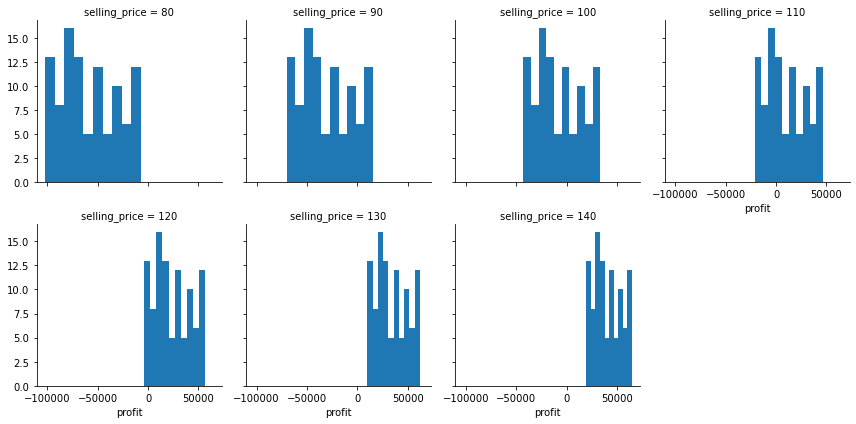

In [88]:
profit_histogram = sns.FacetGrid(model2_results_df, col='selling_price', sharey=True, col_wrap=4)
profit_histogram = profit_histogram.map(plt.hist, "profit")

2)	What is the probability that profit is negative based on our simulation?

In [93]:
negative_profit_count = model2_results_df[model2_results_df.profit < 0].count()['profit']

In [94]:
total_count = model2_results_df.count()['profit']

In [95]:
probability = negative_profit_count/total_count
probability

0.42428571428571427

So there is a 42% chance that we might have a loss.